In [45]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 


# Load the video
cap = cv2.VideoCapture('test.mp4')

# Get the video frame rate and total number of frames
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

fps, total_frames

[ WARN:0@4420.984] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ERROR:0@4420.984] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/videoio/src/cap.cpp (166) open VIDEOIO(GSTREAMER): raised OpenCV exception:

OpenCV(4.6.0) /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/core/src/utils/filesystem.cpp:580: error: (-213:The function/feature is not implemented)  in function 'exists'




(29.97003746032715, 45522.0)

In [46]:
def mse(img1, img2): 
    h, w = img1.shape
    diff = cv2.subtract(img1, img2) 
    err = np.sum(diff ** 2) 
    mse = err/(float(h*w))
    return mse

In [47]:
# Initialize the frame counter and time
frame_count = 0
time = 0
previous_frame = None
frame_differences = []
grayscale_frames = []

# Loop through the video frames
while cap.isOpened():
    # Read the next frame
    ret, frame = cap.read()

    if not ret: 
        # end of the video reached
        break

    # turn to greyscale
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 

    # first frame dont have previous_frame
    if frame_count == 0: 
        # set for next cycle comparison
        previous_frame = frame
        frame_count += 1
        continue

    # 1 frame per second
    if time < frame_count / fps and frame_count > 0:
        print(frame_count / fps)

        # Save the frame
        cv2.imwrite(f"./data/frame{time}.jpg", frame)
        grayscale_frames.append(frame)

        # find differences between frames
        frame_differences.append(mse(previous_frame, frame))

        # set for next iteration
        previous_frame = frame

        # Increase the time, fetch again next second
        time += 1
        
    
    frame_count += 1

# Release the video capture object
cap.release()


0.033366658327462904
1.0009997498238872
2.0019994996477743
3.002999249471661
4.003998999295549
5.004998749119435
6.005998498943322
7.00699824876721
8.007997998591097
9.008997748414984
10.00999749823887
11.010997248062758
12.011996997886644
13.012996747710533
14.01399649753442
15.014996247358306
16.015995997182195
17.01699574700608
18.01799549682997
19.018995246653855
20.01999499647774
21.02099474630163
22.021994496125515
23.022994245949402
24.02399399577329
25.02499374559718
26.025993495421066
27.026993245244952
28.02799299506884
29.028992744892726
30.029992494716613
31.0309922445405
32.03199199436439
33.03299174418827
34.0006248356847
35.00162458550859
36.00262433533247
37.00362408515636
38.004623834980244
39.005623584804134
40.006623334628024
41.00762308445191
42.0086228342758
43.00962258409968
44.01062233392357
45.011622083747454
46.012621833571345
47.01362158339523
48.01462133321912
49.015621083043
50.01662083286689
51.01762058269078
52.018620332514665
53.019620082338555
54.0206198

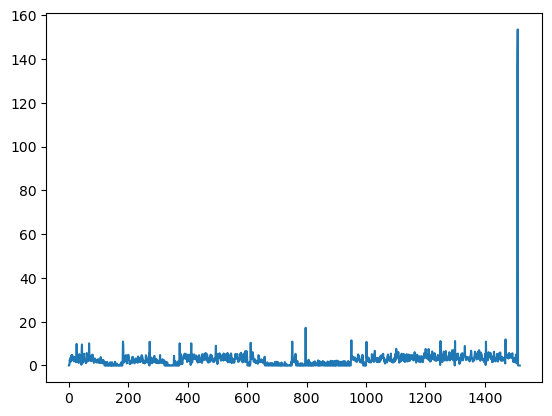

In [48]:
# Plot the vector using a line plot
plt.plot(frame_differences)
plt.show()


In [49]:
frame_differences = np.array(frame_differences)

In [50]:
frame_differences.mean()

2.6261697974498404

In [51]:
diff = np.abs(np.diff(frame_differences))  # Calculate the absolute difference between adjacent elements
big_diff_indices = np.where(diff > 2.52)[0] + 1  # Find the indices where the difference is bigger than 2 and add 1 to get the index of the current element

# Print the indices where the difference is bigger than 2
big_diff_indices


[   8   26   27   35   42   43   44   45   47   52   60   68   69  181
  182  184  193  233  259  270  271  272  273  287  307  308  354  355
  373  374  377  378  398  399  410  411  412  413  449  455  460  467
  494  495  496  502  521  535  546  548  593  594  598  601  612  613
  614  615  638  660  751  752  753  763  764  797  798  807  808  950
  951  952  990 1002 1003 1020 1028 1031 1072 1084 1085 1099 1102 1103
 1110 1126 1127 1130 1137 1169 1201 1211 1212 1220 1225 1231 1232 1251
 1252 1259 1262 1269 1270 1281 1290 1291 1299 1300 1301 1304 1311 1316
 1326 1333 1334 1379 1381 1382 1401 1403 1404 1405 1411 1428 1431 1432
 1452 1453 1470 1471 1510 1511 1512]


In [ ]:
for diff_idx in big_diff_indices: 
    cv2.imwrite(f"./data/frame{diff_idx}.jpg", grayscale_frames[diff_idx])

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

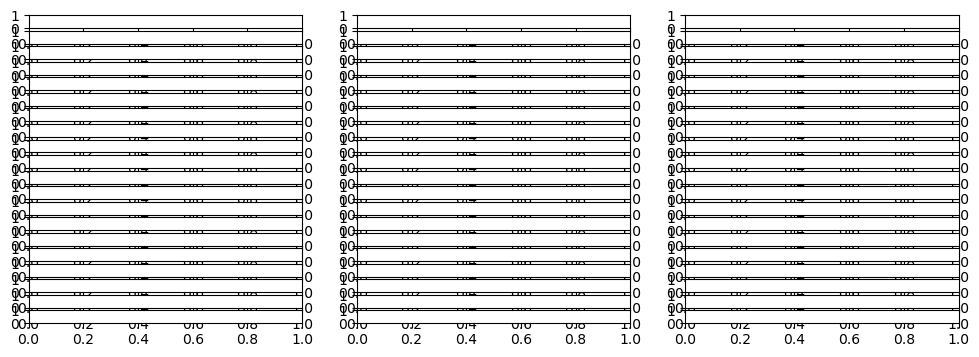

In [59]:
fig, axs = plt.subplots(nrows=20, ncols=3, figsize=(12, 4))

for i, diff_idx in enumerate(big_diff_indices): 
    # Plot each image in a separate subplot
    axs[i].imshow(grayscale_frames[diff_idx], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Image {diff_idx}')
    
# Show the plot
plt.show()

In [54]:
plt.imshow(grayscale_frames[8], cmap='gray')
plt.axis('off')
plt.show()

<generator object show_plots at 0x7ff2f8d19d90>

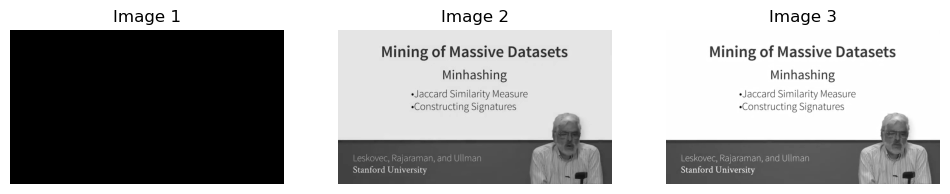

In [56]:
# Create a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot each image in a separate subplot
axs[0].imshow(grayscale_frames[0], cmap='gray')
axs[0].axis('off')
axs[0].set_title('Image 1')

axs[1].imshow(grayscale_frames[1], cmap='gray')
axs[1].axis('off')
axs[1].set_title('Image 2')

axs[2].imshow(grayscale_frames[2], cmap='gray')
axs[2].axis('off')
axs[2].set_title('Image 3')

# Show the plot
plt.show()
